In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import zipfile
zip_ref=zipfile.ZipFile("/content/drive/MyDrive/mini_proj_6/data/train1.zip","r")
zip_ref.extractall("./data1")
zip_ref.close()

zip_ref=zipfile.ZipFile("/content/drive/MyDrive/mini_proj_6/data/test1.zip","r")
zip_ref.extractall("./data1")
zip_ref.close()

Mounted at /content/drive


# All Classes

In [ ]:
train_data_path = 'data1/train'

In [ ]:
path = 'data1/train'

In [ ]:
import os
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names)

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


# Using Transfer Learning

*   50 epochs
*   ImageDataGenerator
*   VGG 19 model



In [ ]:
import tensorflow as tf

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input,validation_split=0.2,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_data_path,  # Path to training data directory
    target_size=(192, 192),
    batch_size=64,
    class_mode='categorical')

val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input,rescale=1./255,validation_split = 0.2)

val_generator = val_datagen.flow_from_directory(
    train_data_path,  # Path to testing data directory
    subset = 'validation',
    target_size=(192, 192),
    batch_size=64,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 517 images belonging to 19 classes.


## Model

In [ ]:
base_model = tf.keras.applications.VGG19(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(192, 192, 3),
    include_top=False,
)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = True

In [ ]:
for layer in base_model.layers:
     layer.trainable = False

In [ ]:

import tensorflow as tf

cnn_model = tf.keras.Sequential()
cnn_model.add(base_model)
cnn_model.add(tf.keras.layers.GlobalAveragePooling2D())
# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))

cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.BatchNormalization())

cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 6, 6, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               5

In [ ]:
from tensorflow.keras.optimizers import Adam
cnn_model.compile(optimizer=Adam(learning_rate=0.001/100),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    mode='min'
)

## Training

In [ ]:
Model = cnn_model.fit(train_generator,
                   epochs = 50,
                   verbose = 1,
                   validation_data = val_generator,
                   callbacks=custom_early_stopping
                 )

Epoch 1/50
41/41 [==============================] - 85s 1s/step - loss: 1.0384 - accuracy: 0.6562 - val_loss: 0.9658 - val_accuracy: 0.6731
Epoch 2/50
41/41 [==============================] - 43s 1s/step - loss: 0.9650 - accuracy: 0.6903 - val_loss: 0.7578 - val_accuracy: 0.7408
Epoch 3/50
41/41 [==============================] - 45s 1s/step - loss: 0.9173 - accuracy: 0.7056 - val_loss: 0.7380 - val_accuracy: 0.7427
Epoch 4/50
41/41 [==============================] - 43s 1s/step - loss: 0.8662 - accuracy: 0.7236 - val_loss: 0.6838 - val_accuracy: 0.7466
Epoch 5/50
41/41 [==============================] - 43s 1s/step - loss: 0.8416 - accuracy: 0.7336 - val_loss: 0.5680 - val_accuracy: 0.8143
Epoch 6/50
41/41 [==============================] - 43s 1s/step - loss: 0.8193 - accuracy: 0.7447 - val_loss: 0.6103 - val_accuracy: 0.8008
Epoch 7/50
41/41 [==============================] - 43s 1s/step - loss: 0.7833 - accuracy: 0.7528 - val_loss: 0.6983 - val_accuracy: 0.7485
Epoch 8/50
41/41 [==

## Graph

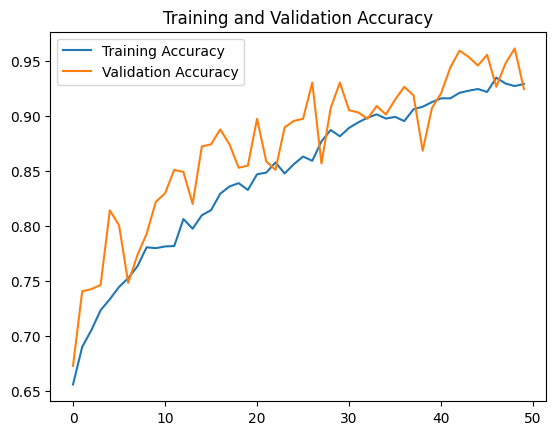

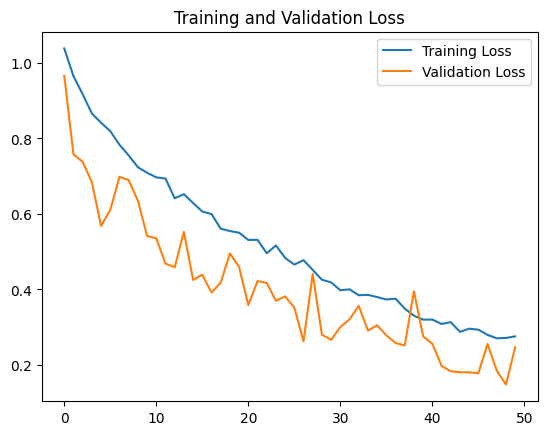

In [ ]:

accuracy = Model.history['accuracy']
val_accuracy = Model.history['val_accuracy']

loss = Model.history['loss']
val_loss = Model.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

## Saving model

In [ ]:
cnn_model.save('/content/drive/MyDrive/mini_proj_6/model/d1.keras')

## Loading model

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/mini_proj_6/model/d1.keras')

In [ ]:
loaded_model.save('/content/drive/MyDrive/mini_proj_6/model/d1.h5')

## Predicting

Enter image path:/content/data1/train/Acne and Rosacea Photos/07Acne081101.jpg
1/1 [==============================] - 1s 1s/step
[[6.4229882e-01 2.6358428e-05 2.0933493e-04 1.5341343e-03 8.4489584e-06
  6.8088480e-06 2.9750209e-04 3.5460302e-01 1.5409085e-05 1.1183577e-05
  1.6552263e-05 1.2645875e-05 1.4480266e-04 2.0777710e-05 1.2030589e-04
  9.9918839e-07 2.2003936e-04 4.2274432e-06 4.4859911e-04]]
0
Acne and Rosacea Photos


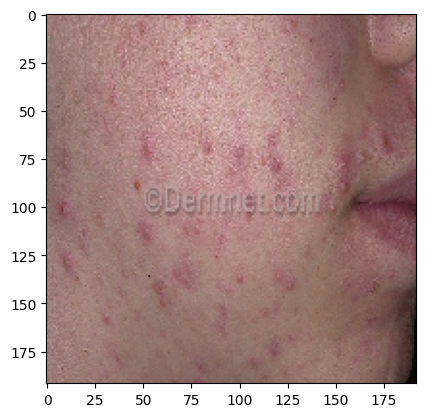

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
import matplotlib.pyplot as plt
classes = ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
           'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections',
           'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos',
           'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases',
           'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis',
           'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors',
           'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections',
           'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']

# path = '/content/data1/train/Acne and Rosacea Photos/07Acne081101.jpg'
path = input('Enter image path:')
img = load_img(path,target_size = (192,192))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x,axis = 0)
image = [x]
plt.imshow(img)
pred = loaded_model.predict(image)
print(pred)
print(np.argmax(pred[0]))
ans = np.argmax(pred[0])
print(classes[ans])

# Making new model from scratch

In [ ]:

import cv2

labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + '/'+cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)

        image = np.asarray(cv2.resize(cv2.imread(path + '/'+ cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])

        images.append(image)
    print('done')


labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

Acne and Rosacea Photos -> done
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> done
Atopic Dermatitis Photos -> done
Cellulitis Impetigo and other Bacterial Infections -> done
Eczema Photos -> done
Exanthems and Drug Eruptions -> done
Herpes HPV and other STDs Photos -> done
Light Diseases and Disorders of Pigmentation -> done
Lupus and other Connective Tissue diseases -> done
Melanoma Skin Cancer Nevi and Moles -> done
Poison Ivy Photos and other Contact Dermatitis -> done
Psoriasis pictures Lichen Planus and related diseases -> done
Seborrheic Keratoses and other Benign Tumors -> done
Systemic Disease -> done
Tinea Ringworm Candidiasis and other Fungal Infections -> done
Urticaria Hives -> done
Vascular Tumors -> done
Vasculitis Photos -> done
Warts Molluscum and other Viral Infections -> done


labels shape: (2609, 19)
images shape: (2609, 192, 192, 3)


## Showing random images

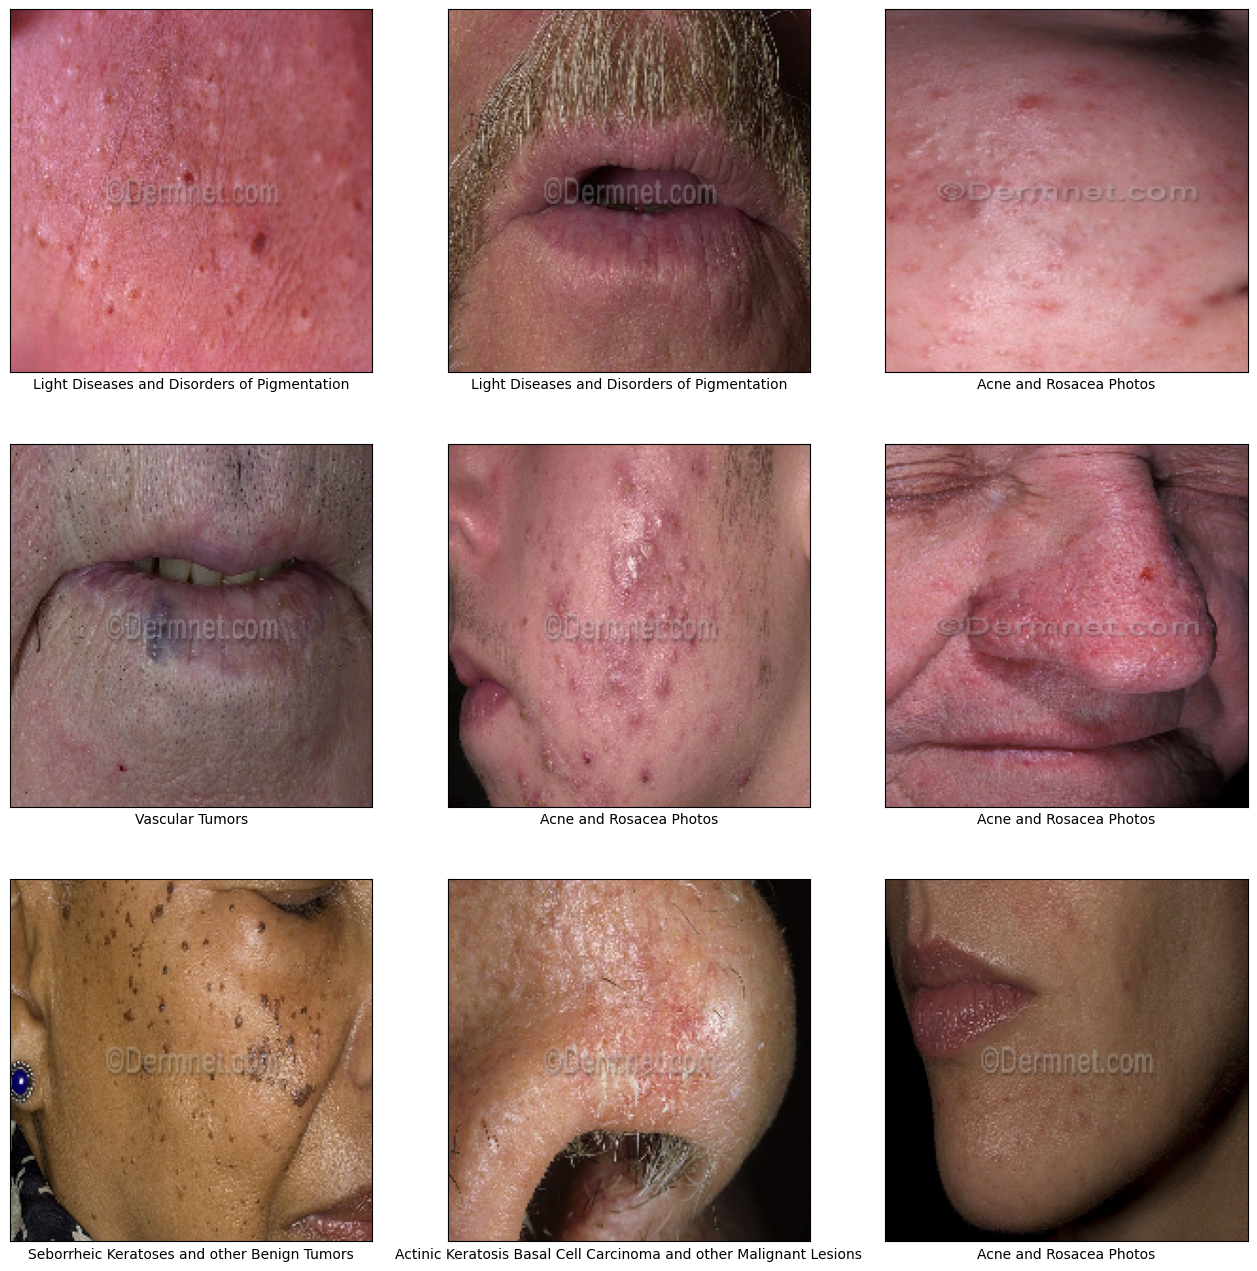

In [ ]:
from random import randint

fig, axs = plt.subplots(3, 3, figsize=(16, 16))

for x in range(3):
    for y in range(3):
        i = randint(0, len(images))

        axs[x][y].imshow(images[i])


        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(class_names[np.argmax(labels[i])])


plt.show()

## Split data

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2087, 192, 192, 3)
train labels shape: (2087, 19)

validation images shape: (522, 192, 192, 3)
validation labels shape: (522, 19)



## CNN Model

In [ ]:
import tensorflow as tf

cnn_model = tf.keras.Sequential()

# Inputs and rescaling
cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 96, 96, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 128)       65664     
                                                      

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# creating ModelChecpoint callback
checkpoint_callback = ModelCheckpoint('cnn_model/model{epoch:02d}')

## Training

In [ ]:
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/20
82/82 [==============================] - 44s 380ms/step - loss: 2.4947 - accuracy: 0.2714 - val_loss: 2.3807 - val_accuracy: 0.3372
Epoch 2/20
82/82 [==============================] - 23s 285ms/step - loss: 2.3407 - accuracy: 0.3220 - val_loss: 2.3129 - val_accuracy: 0.3372
Epoch 3/20
82/82 [==============================] - 24s 295ms/step - loss: 2.2851 - accuracy: 0.3250 - val_loss: 2.2281 - val_accuracy: 0.3410
Epoch 4/20
82/82 [==============================] - 24s 290ms/step - loss: 2.2287 - accuracy: 0.3338 - val_loss: 2.1905 - val_accuracy: 0.3391
Epoch 5/20
82/82 [==============================] - 23s 285ms/step - loss: 2.1844 - accuracy: 0.3407 - val_loss: 2.1014 - val_accuracy: 0.3506
Epoch 6/20
82/82 [==============================] - 24s 287ms/step - loss: 2.1382 - accuracy: 0.3549 - val_loss: 2.0225 - val_accuracy: 0.3889
Epoch 7/20
82/82 [==============================] - 24s 290ms/step - loss: 2.0564 - accuracy: 0.3802 - val_loss: 1.8501 - val_accuracy: 0.4406

## Graph

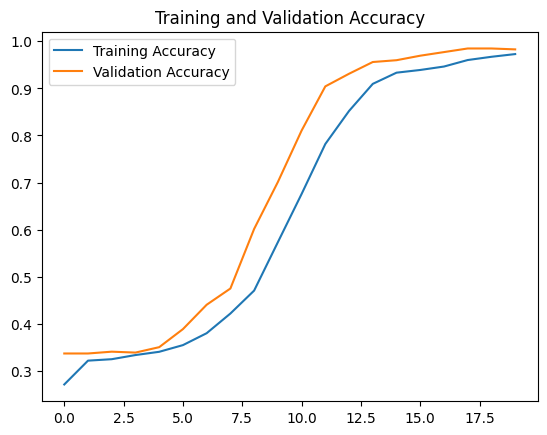

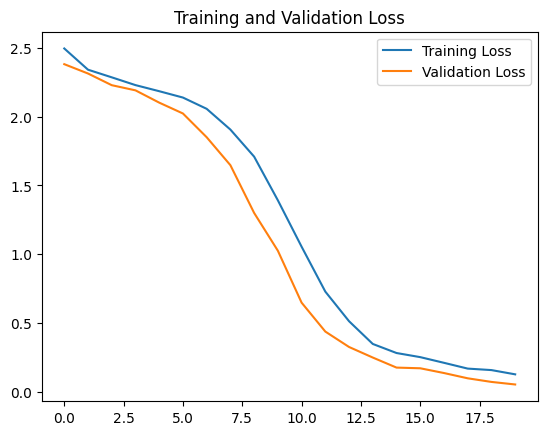

In [ ]:

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.figure()
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

## Saving model

In [ ]:
cnn_model.save('/content/drive/MyDrive/mini_proj_6/model/d2.keras')

## Loading model

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/mini_proj_6/model/d2.keras')

In [ ]:
loaded_model.save('/content/drive/MyDrive/mini_proj_6/model/d2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predicting

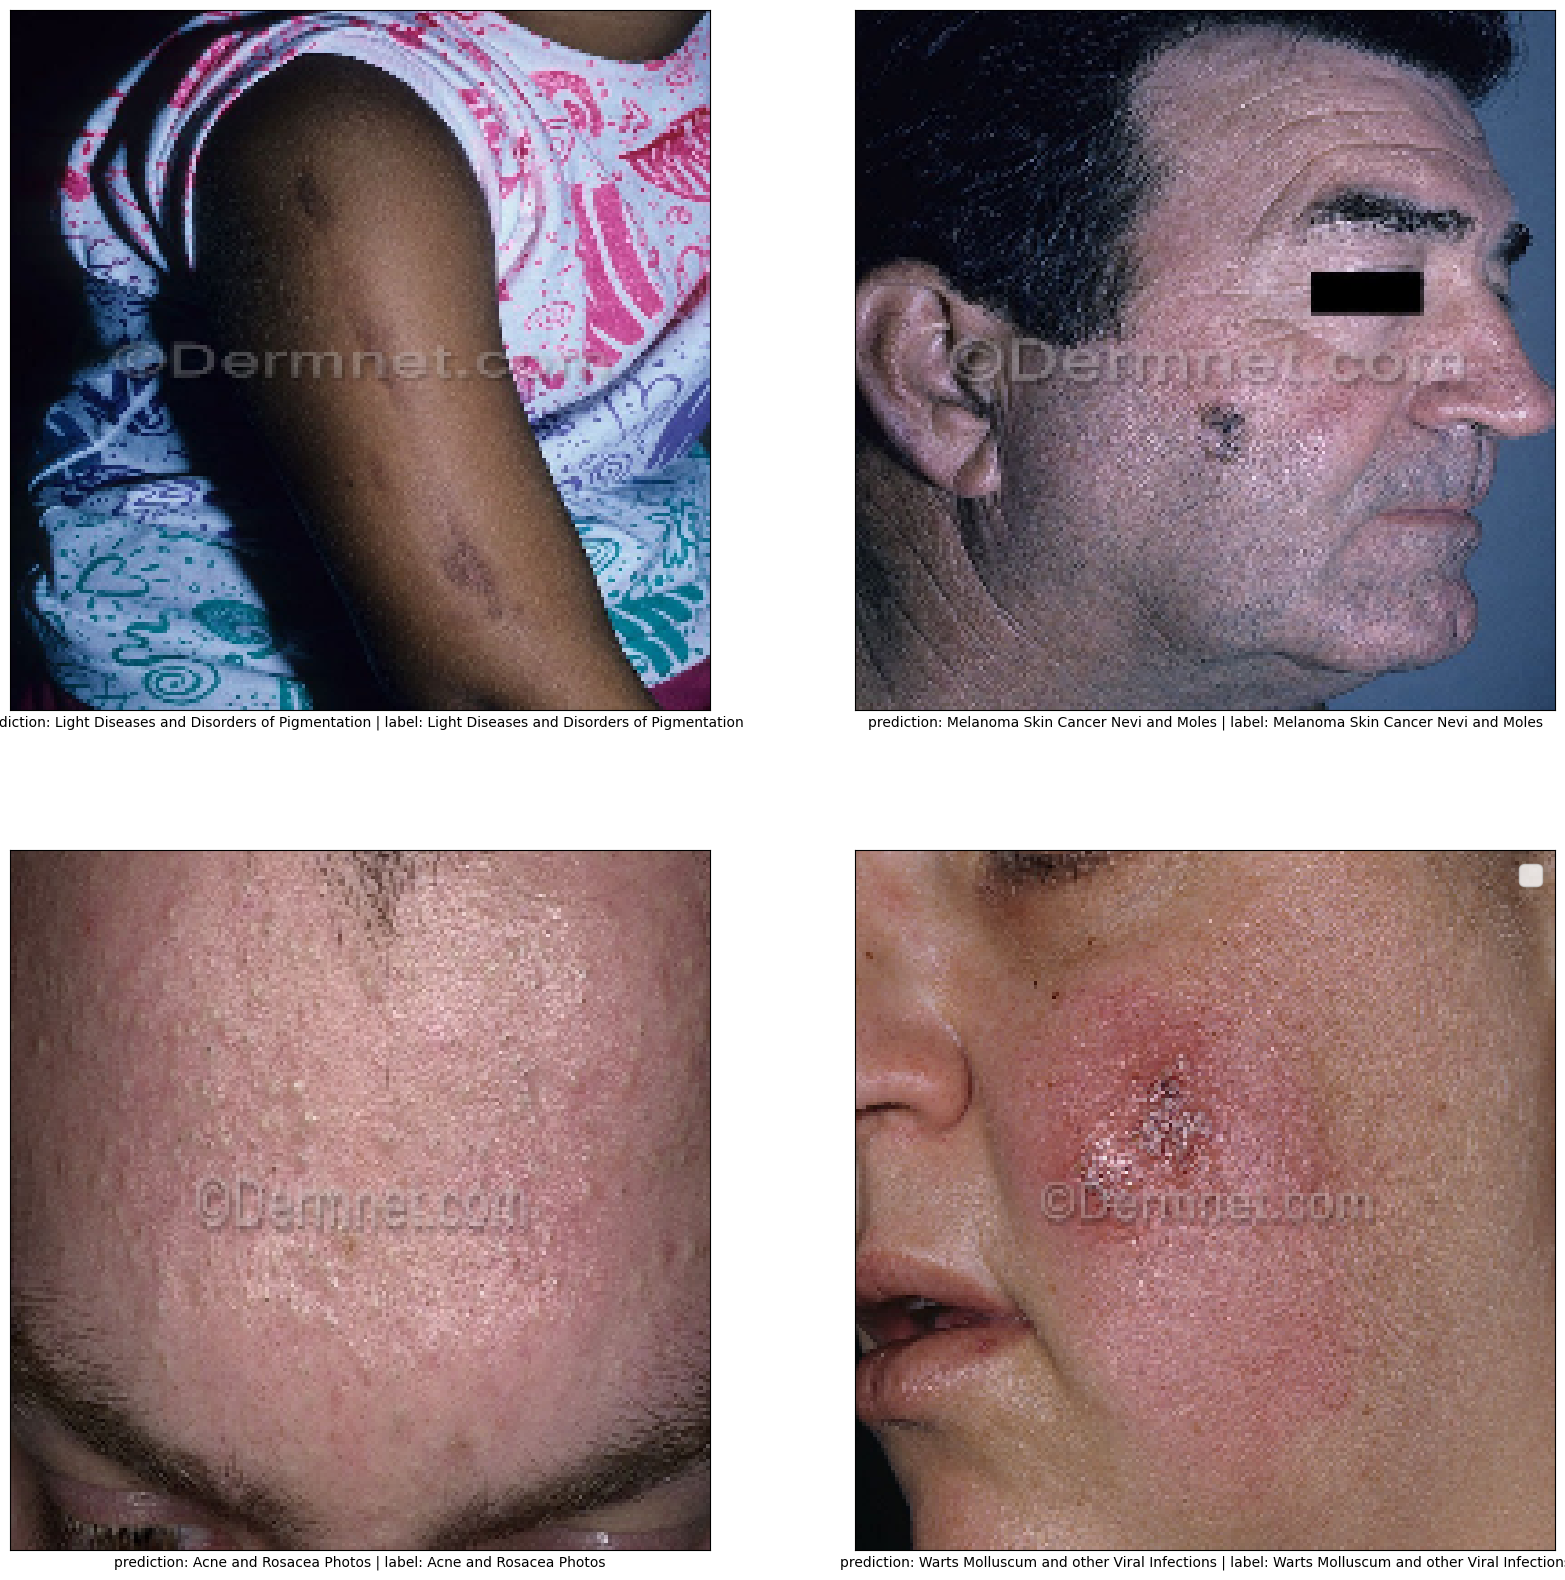

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
plt.legend(fontsize="20")

i = 0
for x in range(2):
    for y in range(2):
        prediction = loaded_model.predict(X_val[i][None, ...], verbose=0)[0],


        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]} | label: {class_names[np.argmax(y_val[i])]}')

        axs[x][y].imshow(X_val[i])

        i += 1
plt.show()
